In [40]:
#whole lotta inputs ASTRO RELated
from astroquery.vizier import Vizier
import astropy.units as u
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.coordinates as coord
import astropy.units as u
import csv
from astropy.io import fits
from astropy.table import Table, vstack
from astropy.wcs import WCS
import astroquery
from astropy.coordinates import SkyCoord
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
import astropy.io.ascii as ascii
from astropy.table import Table, join, unique
import pandas as pd



import os
import time
import sys
import shutil
from datetime import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patheffects as PathEffects
import matplotlib.colors as pltcolors
from matplotlib import gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as csx
import colorsys
import pandas as pd
import numpy as np
import colormaps as cmaps
from scipy.stats import norm

from astropy.stats import mad_std
from astropy.io import fits
from astropy.timeseries import LombScargle
from astropy.coordinates import ICRS, SkyCoord, Galactic, Galactocentric, GalacticLSR, \
                    LSR, CartesianRepresentation
import astropy.units as u
import astropy.constants as c
from astropy.table import Table

from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import astropy
import matplotlib
from astropy.visualization.wcsaxes import WCSAxes

from collections import Counter
import warnings

#machine learning inputs


In [138]:
galah = Table.read('Desktop/research/data/GALAH_DR3_main_allstar_v2.fits')
galah.colnames

['APOGEE_ID',
 'sobject_id',
 'dr2_source_id',
 'dr3_source_id',
 'survey_name',
 'field_id',
 'flag_repeat',
 'wg4_field',
 'wg4_pipeline',
 'flag_sp',
 'teff',
 'e_teff',
 'irfm_teff',
 'irfm_ebv',
 'irfm_ebv_ref',
 'logg',
 'e_logg',
 'fe_h',
 'e_fe_h',
 'flag_fe_h',
 'fe_h_atmo',
 'vmic',
 'vbroad',
 'e_vbroad',
 'chi2_sp',
 'alpha_fe',
 'e_alpha_fe',
 'nr_alpha_fe',
 'flag_alpha_fe',
 'flux_A_Fe',
 'chi_A_Fe',
 'Li_fe',
 'e_Li_fe',
 'nr_Li_fe',
 'flag_Li_fe',
 'C_fe',
 'e_C_fe',
 'nr_C_fe',
 'flag_C_fe',
 'O_fe',
 'e_O_fe',
 'nr_O_fe',
 'flag_O_fe',
 'Na_fe',
 'e_Na_fe',
 'nr_Na_fe',
 'flag_Na_fe',
 'Mg_fe',
 'e_Mg_fe',
 'nr_Mg_fe',
 'flag_Mg_fe',
 'Al_fe',
 'e_Al_fe',
 'nr_Al_fe',
 'flag_Al_fe',
 'Si_fe',
 'e_Si_fe',
 'nr_Si_fe',
 'flag_Si_fe',
 'K_fe',
 'e_K_fe',
 'nr_K_fe',
 'flag_K_fe',
 'Ca_fe',
 'e_Ca_fe',
 'nr_Ca_fe',
 'flag_Ca_fe',
 'Sc_fe',
 'e_Sc_fe',
 'nr_Sc_fe',
 'flag_Sc_fe',
 'Sc2_fe',
 'e_Sc2_fe',
 'nr_Sc2_fe',
 'flag_Sc2_fe',
 'Ti_fe',
 'e_Ti_fe',
 'nr_Ti_fe',
 'fl

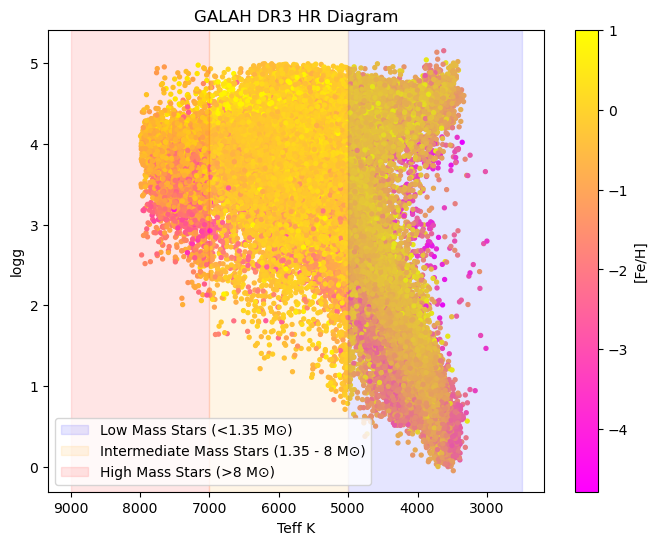

In [152]:
plt.figure(figsize=(8, 6))


sc = plt.scatter(galah['teff'], galah['logg'], c=galah['fe_h'], cmap='spring', s=8)
plt.colorbar(sc, label='[Fe/H]')
plt.gca().invert_xaxis()
plt.xlabel('Teff K')
plt.ylabel("logg")
# plt.ylim(-100,50e4)
plt.title("GALAH DR3 HR Diagram")

#Hr diagram markers 
teff = galah['teff']
# Define mass boundaries (for example, in solar masses)
low_mass = (teff < 6450)  # Low mass stars have lower Teff (this is a rough example)
intermediate_mass = (teff >= 6550) & (teff < 7000)  # Intermediate mass
high_mass = (teff >= 7000)  # High mass stars

# Plot shaded regions for mass groups
plt.axvspan(2500, 5000, color='blue', alpha=0.1, label='Low Mass Stars (<1.35 M⊙)')
plt.axvspan(5000, 7000, color='orange', alpha=0.1, label='Intermediate Mass Stars (1.35 - 8 M⊙)')
plt.axvspan(7000, 9000, color='red', alpha=0.1, label='High Mass Stars (>8 M⊙)')

# # Annotating the regions (optional)
# plt.annotate('Low Mass Stars', xy=(4500, 5), xytext=(4500, 4.7),
#              arrowprops=dict(facecolor='blue', shrink=0.05), color='blue', fontsize=10)
# plt.annotate('Intermediate Mass Stars', xy=(6000, 4), xytext=(6000, 4.2),
#              arrowprops=dict(facecolor='orange', shrink=0.05), color='orange', fontsize=10)
# plt.annotate('High Mass Stars', xy=(18000, -2), xytext=(18000, -2.2),
#              arrowprops=dict(facecolor='red', shrink=0.05), color='red', fontsize=10)

# Show the plot
plt.legend()
plt.savefig('Desktop/machinelearning/galah_hrdiagram.png')
plt.show()

In [81]:
yu = Table.read('Desktop/research/data/vizier_yu2023.fit')
yu

/var/folders/1r/_ykm9y417ll0tmt7btm3lkd00000gn/T/ipykernel_21796/33190531.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('Desktop/machinelearning/yu_hrdiagram.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


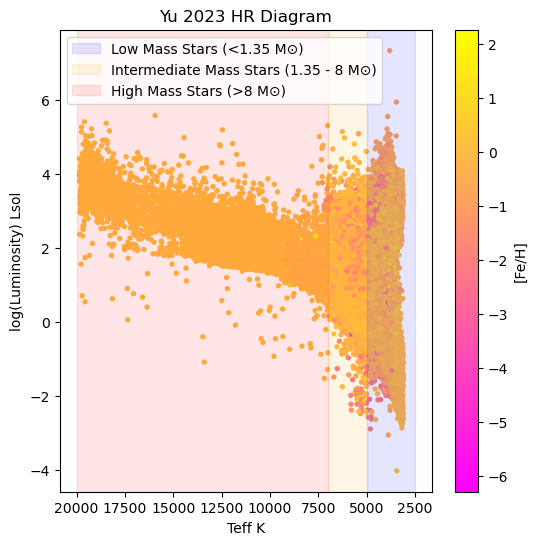

In [134]:
#Yu HR Diagram 
lum = yu['logL']
plt.figure(figsize=(6, 6))


sc = plt.scatter(yu['Teff'], lum, c=yu['FeH'], cmap='spring', s=8)
plt.colorbar(sc, label='[Fe/H]')
plt.gca().invert_xaxis()
plt.xlabel('Teff K')
plt.ylabel("log(Luminosity) Lsol")
# plt.ylim(-100,50e4)
plt.title("Yu 2023 HR Diagram")

#Hr diagram markers 
teff = yu['Teff']
# Define mass boundaries (for example, in solar masses)
low_mass = (teff < 6450)  # Low mass stars have lower Teff (this is a rough example)
intermediate_mass = (teff >= 6550) & (teff < 7000)  # Intermediate mass
high_mass = (teff >= 7000)  # High mass stars

# Plot shaded regions for mass groups
plt.axvspan(2500, 5000, color='blue', alpha=0.1, label='Low Mass Stars (<1.35 M⊙)')
plt.axvspan(5000, 7000, color='orange', alpha=0.1, label='Intermediate Mass Stars (1.35 - 8 M⊙)')
plt.axvspan(7000, 20000, color='red', alpha=0.1, label='High Mass Stars (>8 M⊙)')

# # Annotating the regions (optional)
# plt.annotate('Low Mass Stars', xy=(4500, 5), xytext=(4500, 4.7),
#              arrowprops=dict(facecolor='blue', shrink=0.05), color='blue', fontsize=10)
# plt.annotate('Intermediate Mass Stars', xy=(6000, 4), xytext=(6000, 4.2),
#              arrowprops=dict(facecolor='orange', shrink=0.05), color='orange', fontsize=10)
# plt.annotate('High Mass Stars', xy=(18000, -2), xytext=(18000, -2.2),
#              arrowprops=dict(facecolor='red', shrink=0.05), color='red', fontsize=10)

# Show the plot
plt.legend()
plt.savefig('Desktop/machinelearning/yu_hrdiagram.png')
plt.show()


In [ ]:
gaia = Table.read()